In [57]:
import pandas as pd

In [58]:
df= pd.read_csv("drug - drug.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [59]:
inputs=df.drop('Drug',axis='columns')
target=df['Drug']

In [60]:
target

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le_sex=LabelEncoder()
le_BP=LabelEncoder()
le_cholesterol=LabelEncoder()

In [63]:
inputs['Sex_n']=le_sex.fit_transform(inputs['Sex'])
inputs['Bp_n']=le_BP.fit_transform(inputs['BP'])
inputs['Cholesterol_n']=le_cholesterol.fit_transform(inputs['Cholesterol'])
inputs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Sex_n,Bp_n,Cholesterol_n
0,23,F,HIGH,HIGH,25.355,0,0,0
1,47,M,LOW,HIGH,13.093,1,1,0
2,47,M,LOW,HIGH,10.114,1,1,0
3,28,F,NORMAL,HIGH,7.798,0,2,0
4,61,F,LOW,HIGH,18.043,0,1,0


In [64]:
inputs=inputs.drop(['Sex','BP','Cholesterol','Cholesterol_n','Age','Na_to_K'],axis='columns')
inputs.head()

,Sex_n,Bp_n
0,0,0
1,1,1
2,1,1
3,0,2
4,0,1


In [65]:
le_Drug=LabelEncoder()

In [66]:
target=le_Drug.fit_transform(target)
target

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

In [67]:
from sklearn import tree

In [68]:
model=tree.DecisionTreeClassifier()

In [69]:
model.fit(inputs,target)

DecisionTreeClassifier()

In [70]:
model.score(inputs,target)

0.52

In [71]:
model.predict([[0,0]])

C:\Users\Me\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([4])

In [72]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


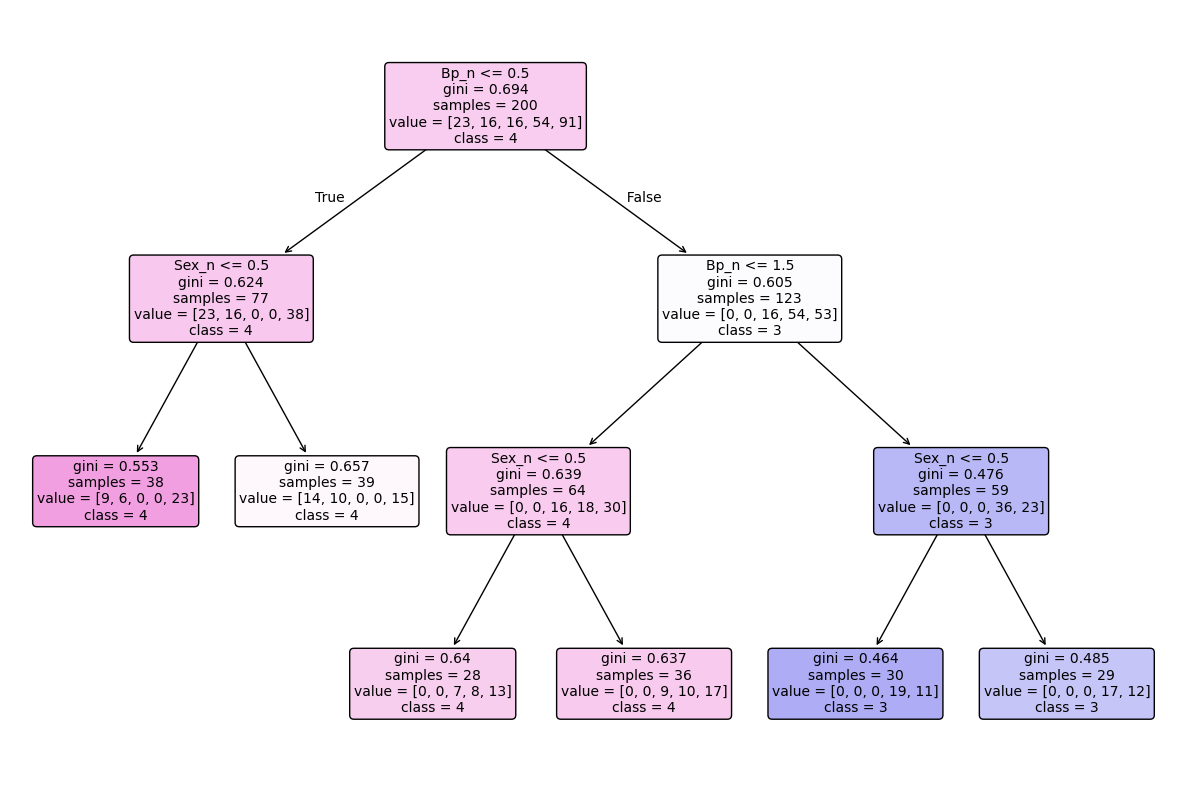

In [73]:
plt.figure(figsize=(15, 10))  
plot_tree(model, 
          feature_names=inputs.columns, 
          class_names=[str(cls) for cls in model.classes_],  
          filled=True,  
          rounded=True,  
          fontsize=10)

plt.show()